In [18]:
%matplotlib inline
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels as sm

# Varying $VS$

In these models, fitness is Gaussian, with $w = e^{-[(P-P_o)^2]/(2VS)}$, where $P$ is the trait value, $P_o$ the optimum trait value, and $VS$ the intensity of selection against extreme trait values.

Mutational effects, $e$, and $P_o$ are only meaningful with respect to $VS$.  Thus, if you change $VS$ in a simulation, then fitnesses obviously change.  This effect has practical implications.  For example, if you want to track $VG$ over time, then you probably want to scale the variance in effect sizes ($\sigma_\mu$) and $P_o$  such that fitnesses are held constant.

This notebook illustrates how to do that.

## Scaling effect sizes

As a point of reference, we will using $VS=1$ with a mutational variance of $\sigma_\mu^2 = 0.05$.  As we vary $VS$, the appropriate $\sigma_\mu^2 = 0.05\times VS$: 

In [33]:
def get_fitness(x,VS,optimum = 0.0):
    return math.exp(-1.0*(math.pow(x-optimum*math.sqrt(VS),2.0))/(2.0*VS))

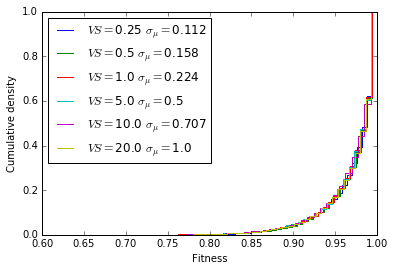

In [41]:
refSigma = math.sqrt(0.05)
fig=plt.figure()
VS=[0.25,0.5,1.0,5.0,10.0,20.0]
for vs in VS:
    #This is the corresponding sigma_mu for this VS
    sigma=refSigma*math.sqrt(vs)
    samples=np.random.normal(0.0,sigma,10000)
    w=sorted([get_fitness(i,vs) for i in samples])
    ecdf=sm.distributions.ECDF(w)
    x=np.linspace(min(w),max(w))
    y=ecdf(x)
    plt.step(x,y,label=r'$VS = $'+'{0:0.3}'.format(vs)+r' $\sigma_\mu = $'+'{0:0.3}'.format(sigma))
plt.legend(loc="upper left")
plt.xlabel("Fitness")
plt.ylabel("Cumulative density")

## Changing the optimum

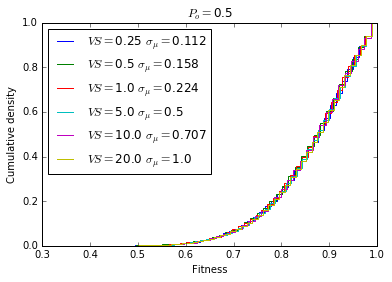

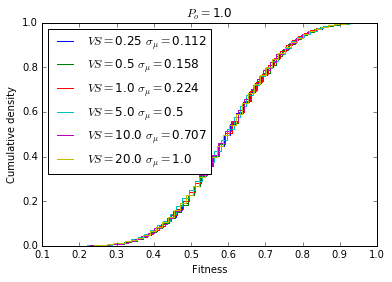

In [44]:
for Po in [0.5,1.0]:     #This is the optimum for our "reference" VS of 1....
    fig = plt.figure()
    for vs in VS:
        sigma=refSigma*math.sqrt(vs)
        samples=np.random.normal(0.0,sigma,10000)
        w=sorted([get_fitness(i,vs,Po) for i in samples])
        ecdf=sm.distributions.ECDF(w)
        x=np.linspace(min(w),max(w))
        y=ecdf(x)
        plt.step(x,y,label=r'$VS = $'+'{0:0.3}'.format(vs)+r' $\sigma_\mu = $'+'{0:0.3}'.format(sigma))
    plt.legend(loc="upper left")
    plt.xlabel("Fitness")
    plt.ylabel("Cumulative density")
    plt.title(r'$P_o = $'+'{0:0.3}'.format(Po))

## Keeping equilibrium $VG$ constant

So we know know how to keep fitnesses constant when we change $VS$ and $P_o$.  However, $VG \approx 4\mu VS$, so changing $VS$ changes $VG$ at equilibrium, which has a clear impact on how a population adapts to an optimum shift.  It is trivial to keep $VG$ in check by changing $\mu$.  Further, changing $\sigma_\mu$ as above keeps the input mutational variance constant:

In [47]:
reference_mu=1e-3
reference_VG= 4.0*reference_mu
for vs in VS:
    mu=reference_VG/(4.0*vs)
    sigma=refSigma*math.sqrt(vs)
    print "mu = ",mu,", sigma = ",sigma,", VM = ",2.0*mu*math.pow(sigma,2.0)

mu =  0.004 , sigma =  0.111803398875 , VM =  0.0001
mu =  0.002 , sigma =  0.158113883008 , VM =  0.0001
mu =  0.001 , sigma =  0.22360679775 , VM =  0.0001
mu =  0.0002 , sigma =  0.5 , VM =  0.0001
mu =  0.0001 , sigma =  0.707106781187 , VM =  0.0001
mu =  5e-05 , sigma =  1.0 , VM =  0.0001
